<a href="https://colab.research.google.com/github/AkankshaAmbasta/Cat-v-Dog/blob/main/cat_v_dog_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:14<00:00, 137MB/s]
100% 1.06G/1.06G [00:14<00:00, 78.4MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout

In [14]:
#generator-- create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))


validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
#create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))







In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.1648 - accuracy: 0.5859 - val_loss: 0.6445 - val_accuracy: 0.6452
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5952 - accuracy: 0.6909 - val_loss: 0.6038 - val_accuracy: 0.7198
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4798 - accuracy: 0.7702 - val_loss: 0.5710 - val_accuracy: 0.7300
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4128 - accuracy: 0.8118 - val_loss: 0.6930 - val_accuracy: 0.7082
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3502 - accuracy: 0.8472 - val_loss: 1.1036 - val_accuracy: 0.6526
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2829 - accuracy: 0.8823 - val_loss: 0.6394 - val_accuracy: 0.7910
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2037 - accuracy: 0.9195 - val_loss: 0.4869 - val_ac

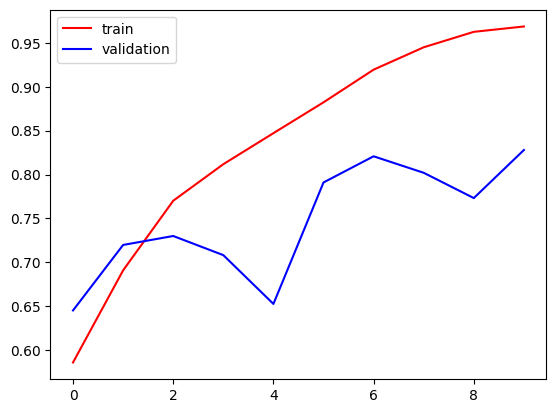

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')

plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:

import cv2

In [22]:
test_img = cv2.imread('/content/dog-png-30.png')

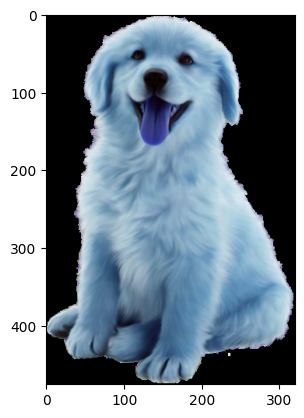

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(476, 320, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

In [39]:
test_img = cv2.imread('/content/cat.png')

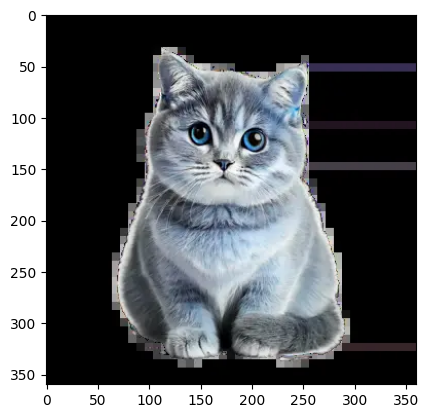

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(360, 360, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)